In [1]:
import sys
sys.path.append("../../src")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import aligned and frequency-reduced variant counts
These tables have been aligned with the subtype target, and eliminated features that are nonzero in <0.05 or >0.95 of subjects.

In [3]:
wes_dn = "../wes/data"

vc = pd.read_csv(os.path.join(wes_dn, "200825_aligned_applythres_vc.csv"), header=0, index_col=0)
st = pd.read_csv(os.path.join(wes_dn, "aligned_subtype.csv"), index_col=0, header=0)

# Model training

In [4]:
X = np.array(vc)
y = np.array(st, dtype=int).reshape((-1,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(263, 1522) (88, 1522)
(263,) (88,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from ModelTraining import HyperparameterTuning
from ModelEvaluation import ROCMulti

### Logistic Regression

In [7]:
lrm = LogisticRegression(class_weight="balanced", max_iter=3000, n_jobs=8)
lrm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

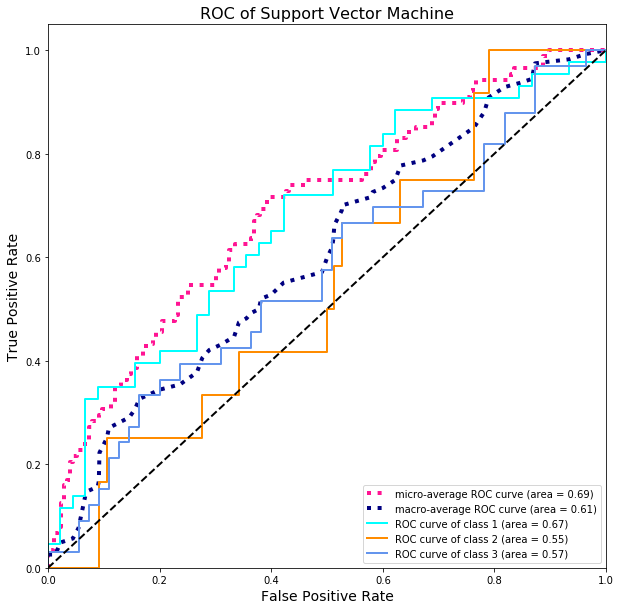

In [8]:
rocmulti = ROCMulti(lrm, X_test, y_test)
fig = rocmulti.plot_all()

In [9]:
# fig.savefig("roc_lrm.png")

In [10]:
# pd.DataFrame(
#     lrm.coef_, 
#     index=["Subtype I", "Subtype II", "Subtype III"], 
#     columns=vc.columns
# ).to_csv("~/200830_lrm_coefficient_mx.csv", index=True, header=True)

### Support Vector Machine

In [11]:
svm = SVC(class_weight="balanced", max_iter=3000, probability=True, random_state=240)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=3000, probability=True, random_state=240, shrinking=True,
    tol=0.001, verbose=False)

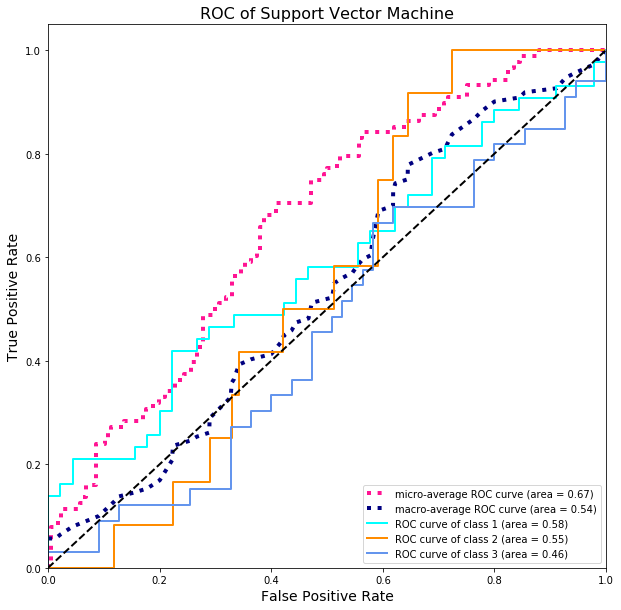

In [12]:
rocmulti = ROCMulti(svm, X_test, y_test)
fig = rocmulti.plot_all()

In [13]:
# fig.savefig("roc_svm.png")